# Modeling: Predictive Insights from Portuguese Bank Marketing Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from tabulate import tabulate

# Data

In [2]:
# Load the data
data_bank = pd.read_csv('data_bank.csv')

In [3]:
# Separate the features and target variable; drop 'duration' variable since it is available after the call 
X = data_bank.drop(['target','duration'], axis=1)
y = data_bank['target']

In [4]:
# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

In [5]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Modeling
# Logistic Regression
Hyperparameter tuning for a Logistic Regression model using `GridSearchCV` class from `scikit-learn`. 

In [6]:
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()
params = {"C": [.001, .01, .1 ,1 ,10], "penalty": ["l1", "l2"], "solver":["liblinear"], "max_iter":[1000] }
gs = GridSearchCV(lr, param_grid = params, scoring = "roc_auc")
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [7]:
model1_preds = gs.fit(X_train, y_train)

In [8]:
gs.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [9]:
gs.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [10]:
gs.best_score_ #whichever model has best score is the one we use for thresholding

0.7686832758121489

In [11]:
gs.cv_results_

{'mean_fit_time': array([0.08500628, 0.17729473, 0.1234334 , 0.26906161, 0.2439198 ,
        0.27895932, 0.83287988, 0.30784712, 0.29934673, 0.56031032]),
 'std_fit_time': array([0.00503407, 0.0093678 , 0.0081776 , 0.02874857, 0.03652037,
        0.03286109, 0.43487678, 0.05257538, 0.14095368, 0.34748939]),
 'mean_score_time': array([0.00815306, 0.0077508 , 0.00823894, 0.00773501, 0.00858884,
        0.00781136, 0.00833387, 0.00781736, 0.00836143, 0.00923142]),
 'std_score_time': array([0.00014724, 0.00052113, 0.00015841, 0.00027722, 0.00081707,
        0.00034838, 0.00033258, 0.00016968, 0.00016848, 0.00144981]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
                    1000],
              

In [12]:
lr = LogisticRegression(C=10)

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest model
rf = RandomForestClassifier()

# Define a parameter grid
params = {
    "n_estimators": [50, 100, 250],
    "max_depth": [1, 5, 20, None],
    "max_features": ["sqrt", 0.1, 0.5]
}

# Create a GridSearchCV object
gs_rf = GridSearchCV(rf, param_grid=params, scoring="roc_auc")

# Fit the GridSearchCV to your training data
gs_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 20, None],
                         'max_features': ['sqrt', 0.1, 0.5],
                         'n_estimators': [50, 100, 250]},
             scoring='roc_auc')

In [14]:
 model2_preds = gs_rf.fit(X_train, y_train)

In [35]:
# Check the best parameters recommended by GridSearchCV
best_params = gs_rf.best_params_
print(best_params)

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 250}


# XGBoost

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create an XGBoost model
xgb = XGBClassifier()

# Define a parameter grid
params = {
    "max_depth": [1, 5, 20, None],
    "min_child_weight": [1, 3, 5, 10]
}

# Create a GridSearchCV object
gs_xgb = GridSearchCV(xgb, param_grid=params, scoring="roc_auc")

# Fit the GridSearchCV to your training data
gs_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_c

In [16]:
model3_preds = gs_xgb.fit(X_train, y_train)

# ROC curve with 3 models

In [17]:
from sklearn.metrics import roc_auc_score

# y_test = true labels of the test dataset

# For Logistic Regression
lr_predictions = gs.predict_proba(X_test)[:, 1]
lr_roc_auc = roc_auc_score(y_test, lr_predictions)
print("ROC AUC for Logistic Regression: ", lr_roc_auc)

# For Random Forest
rf_predictions = gs_rf.predict_proba(X_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
print("ROC AUC for Random Forest: ", rf_roc_auc)

# For XGBoost
xgb_predictions = gs_xgb.predict_proba(X_test)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, xgb_predictions)
print("ROC AUC for XGBoost: ", xgb_roc_auc)

ROC AUC for Logistic Regression:  0.7575128820586212
ROC AUC for Random Forest:  0.7940525831432224
ROC AUC for XGBoost:  0.7898936930473769


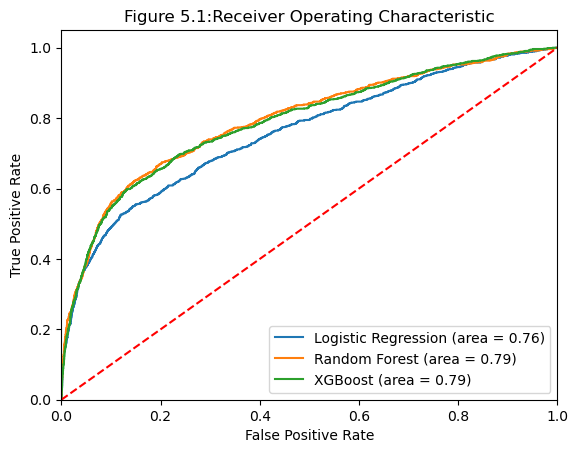

<Figure size 640x480 with 0 Axes>

In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# For Logistic Regression
fpr, tpr, _ = roc_curve(y_test, lr_predictions)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)

# For Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_predictions)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# For XGBoost
fpr, tpr, _ = roc_curve(y_test, xgb_predictions)
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)

# Plotting ROC for all models
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 5.1:Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Save the plot as PNG
plt.savefig('ROC_curve.png')

# Threshold vs. Profitability curve 
In this code, we first define a function calculate_profit that calculates the profit for a given threshold. This function first applies the threshold to the predicted probabilities to get the predicted classes. It then calculates the number of true positives and the number of predicted positives. The revenue is calculated as the number of true positives times the revenue per subscription, and the cost is calculated as the number of predicted positives times the cost per call. The profit is then the difference between the revenue and the cost.

We then define the revenue per subscription and the cost per call and a range of thresholds. We calculate the profit for each threshold and plot the threshold vs the profitability.

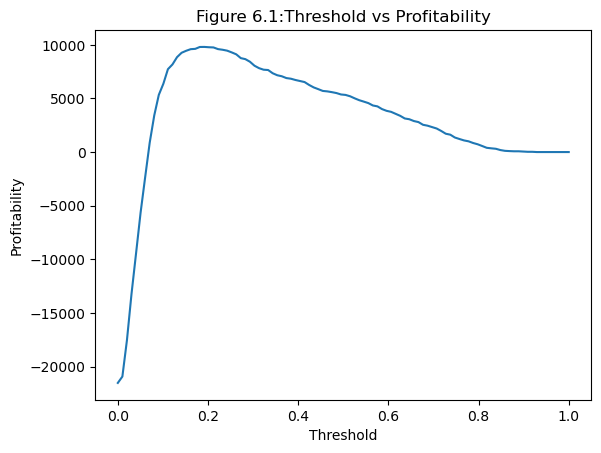

<Figure size 640x480 with 0 Axes>

In [24]:
def calculate_profit(y_pred, y_true, threshold, revenue_per_sub, cost_per_call):
    # Apply threshold to positive probabilities
    y_pred_threshold = (y_pred > threshold).astype(int)
    
    # Calculate true positives
    true_positives = np.sum((y_pred_threshold == 1) & (y_true == 1))
    
    # Calculate predicted positives
    predicted_positives = np.sum(y_pred_threshold)
    
    # Calculate revenue and cost
    revenue = true_positives * revenue_per_sub
    cost = predicted_positives * cost_per_call
    
    # Calculate profit
    profit = revenue - cost
    
    return profit

# Define revenue per subscription and cost per call
revenue_per_sub = 30 # assumed value
cost_per_call = 6  # cost per call according to www.qualtrics.com

# Define range of thresholds
thresholds = np.linspace(0, 1, 100)

# Calculate profit for each threshold
profits = [calculate_profit(rf_predictions, y_test, threshold, revenue_per_sub, cost_per_call) 
           for threshold in thresholds]

# Plot threshold vs profitability
plt.plot(thresholds, profits)
plt.xlabel('Threshold')
plt.ylabel('Profitability')
plt.title('Figure 6.1:Threshold vs Profitability')
plt.show()

# Save the plot as PNG
plt.savefig('threshold_vs_profitability.png')

# Classification Report: Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Create an instance of RandomForestClassifier 
rf_classifier = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=250)


# Fit the model on your training data
rf_classifier.fit(X_train, y_train)

# Now you can use the fitted model for prediction or evaluation
predictions = rf_classifier.predict(X_test)

report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.70      0.23      0.35      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.61      0.65      9043
weighted avg       0.88      0.90      0.87      9043



In [41]:
import pandas as pd
# Generate the classification report
report = classification_report(y_test, predictions, output_dict=True)

# Convert the classification report to a DataFrame
df_report = pd.DataFrame(report).transpose().round(4)

# Save the DataFrame as a CSV file
df_report.to_csv('classification_report.csv', index=True)